In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import mean_absolute_error


In [34]:
# Carregar o dataset
df = pd.read_csv('dataset_casas.csv')

# Estatísticas básicas
print(df.describe())

              area     quartos   banheiros  vagas_garagem    mobiliado  \
count   990.000000  990.000000  990.000000    1000.000000  1000.000000   
mean    157.391476    3.044444    1.982828       1.436000     0.704000   
std     104.453035    1.425623    0.834487       1.114067     0.456719   
min      30.000000    1.000000    1.000000       0.000000     0.000000   
25%     118.100000    2.000000    1.000000       0.000000     0.000000   
50%     151.350000    3.000000    2.000000       1.000000     1.000000   
75%     182.475000    4.000000    3.000000       2.000000     1.000000   
max    1816.620504    5.000000    3.000000       3.000000     1.000000   

           piscina   area_verde       idade  distancia_centro         preco  
count  1000.000000  1000.000000  990.000000       1000.000000  1.000000e+03  
mean      0.188000     0.577000   24.087879          4.913838  6.555094e+05  
std       0.390908     0.494283   14.496935          2.114070  5.134067e+05  
min       0.000000   

In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   area              990 non-null    float64
 1   quartos           990 non-null    float64
 2   banheiros         990 non-null    float64
 3   vagas_garagem     1000 non-null   int64  
 4   bairro            1000 non-null   object 
 5   mobiliado         1000 non-null   int64  
 6   piscina           1000 non-null   int64  
 7   area_verde        1000 non-null   int64  
 8   idade             990 non-null    float64
 9   distancia_centro  1000 non-null   float64
 10  preco             1000 non-null   float64
dtypes: float64(6), int64(4), object(1)
memory usage: 86.1+ KB
None


In [36]:
# Média, mediana e moda das colunas numericas
colunas_numericas = df.select_dtypes(include=['int64', 'float64']).columns

print("\nMédia das colunas numéricas:")
print(df[colunas_numericas].mean())

print("\nMediana das colunas numéricas:")
print(df[colunas_numericas].median())

print("\nModa das colunas numéricas:")
print(df[colunas_numericas].mode().iloc[0])



Média das colunas numéricas:
area                   157.391476
quartos                  3.044444
banheiros                1.982828
vagas_garagem            1.436000
mobiliado                0.704000
piscina                  0.188000
area_verde               0.577000
idade                   24.087879
distancia_centro         4.913838
preco               655509.365864
dtype: float64

Mediana das colunas numéricas:
area                   151.35
quartos                  3.00
banheiros                2.00
vagas_garagem            1.00
mobiliado                1.00
piscina                  0.00
area_verde               1.00
idade                   24.00
distancia_centro         4.90
preco               564449.71
dtype: float64

Moda das colunas numéricas:
area                   30.00
quartos                 4.00
banheiros               1.00
vagas_garagem           0.00
mobiliado               1.00
piscina                 0.00
area_verde              1.00
idade                  38.00
distanc

In [37]:
print(df.isnull().sum())

area                10
quartos             10
banheiros           10
vagas_garagem        0
bairro               0
mobiliado            0
piscina              0
area_verde           0
idade               10
distancia_centro     0
preco                0
dtype: int64


In [38]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

def avaliar_regressao_linear(df):
    # Selecionar features numéricas
    features = ['area', 'quartos', 'banheiros', 'vagas_garagem', 'idade', 'distancia_centro']
    
    # Remover linhas com valores nulos
    df_clean = df.dropna(subset=features + ['preco'])
    
    # Separar features (X) e target (y)
    X = df_clean[features]
    y = df_clean['preco']
    
    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criar e treinar o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("\nResultados da Regressão Linear:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: R$ {rmse:.2f}")
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mostrar coeficientes
    print(f"MAE: R$ {mae:.2f}")
    print("\nCoeficientes do modelo:")
    for feature, coef in zip(features, modelo.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercepto: {modelo.intercept_:.2f}")
    
    # Plotar resultados
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Previsto')
    plt.title('Preços Reais vs Previstos')
    plt.show()


In [39]:
def avaliar_regressao_linear_area(df):
    """
    Avalia o desempenho de uma regressão linear usando apenas a área como feature
    """
    # Selecionar apenas área como feature
    X = df[['area']]
    y = df['preco']
    
    # Remover linhas com valores nulos
    df_clean = df.dropna(subset=['area', 'preco'])
    X = df_clean[['area']]
    y = df_clean['preco']
    
    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criar e treinar o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("\nResultados da Regressão Linear apenas com Área:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: R$ {rmse:.2f}")
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mostrar coeficientes
    print(f"MAE: R$ {mae:.2f}")
    print("\nCoeficientes do modelo:")
    print(f"area: {modelo.coef_[0]:.2f}")
    print(f"Intercepto: {modelo.intercept_:.2f}")
    
    # Plotar resultados
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Previsto')
    plt.title('Preços Reais vs Previstos - Modelo apenas com Área')
    plt.show()
    
    return modelo, r2, rmse


In [40]:
def avaliar_regressao_linear_eng(df):
    """
    Avalia o desempenho de uma regressão linear com features de engenharia
    """
    # Selecionar features numéricas
    features = ['preco_m2', 'quartos_por_banheiro', 'vagas_por_quarto', 'imovel_premium']
    
    # Separar features (X) e target (y)
    X = df[features]
    y = df['preco']
    
    # Dividir em treino e teste (80% treino, 20% teste)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # Criar e treinar o modelo
    modelo = LinearRegression()
    modelo.fit(X_train, y_train)
    
    # Fazer previsões
    y_pred = modelo.predict(X_test)
    
    # Calcular métricas
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
    print("\nResultados da Regressão Linear com Engenharia de Features:")
    print(f"R² Score: {r2:.4f}")
    print(f"RMSE: R$ {rmse:.2f}")
    mae = mean_absolute_error(y_test, y_pred)
    
    # Mostrar coeficientes
    print(f"MAE: R$ {mae:.2f}")
    print("\nCoeficientes do modelo:")
    for feature, coef in zip(X.columns, modelo.coef_):
        print(f"{feature}: {coef:.2f}")
    print(f"Intercepto: {modelo.intercept_:.2f}")
    
    # Plotar resultados
    plt.figure(figsize=(10, 5))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
    plt.xlabel('Preço Real')
    plt.ylabel('Preço Previsto')
    plt.title('Preços Reais vs Previstos - Modelo com Engenharia')
    plt.show()
    
    return modelo, r2, rmse


Resultados da Regressão Linear:
R² Score: 0.2480
RMSE: R$ 326623.12
MAE: R$ 254910.74

Coeficientes do modelo:
area: 625.44
quartos: 38590.10
banheiros: 55558.35
vagas_garagem: 35358.18
idade: -1715.53
distancia_centro: -9466.65
Intercepto: 367915.73


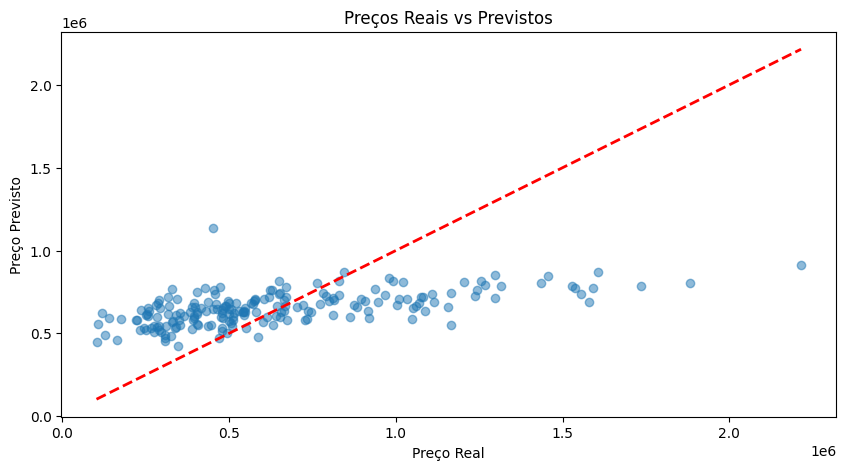

In [41]:
# Executar a análise
avaliar_regressao_linear(df)

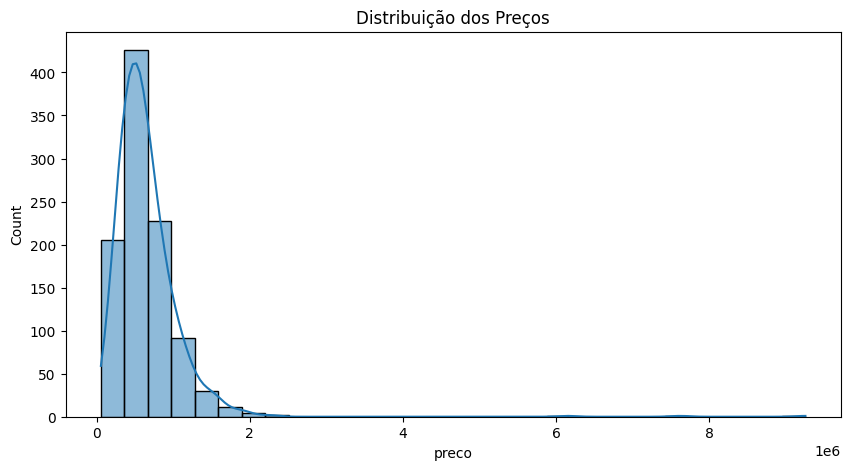

In [42]:

# Visualizações
plt.figure(figsize=(10, 5))
sns.histplot(df['preco'], bins=30, kde=True)
plt.title('Distribuição dos Preços')
plt.show()

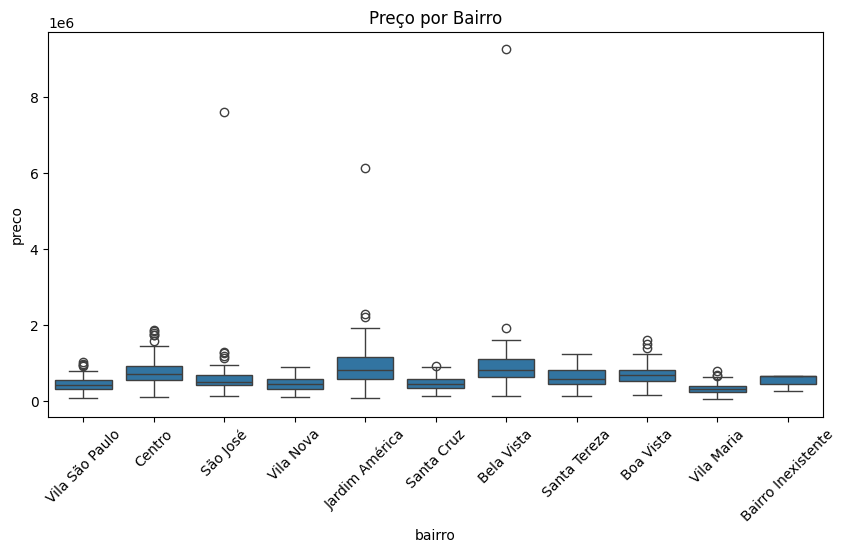

In [43]:


plt.figure(figsize=(10, 5))
sns.boxplot(x='bairro', y='preco', data=df)
plt.title('Preço por Bairro')
plt.xticks(rotation=45)
plt.show()

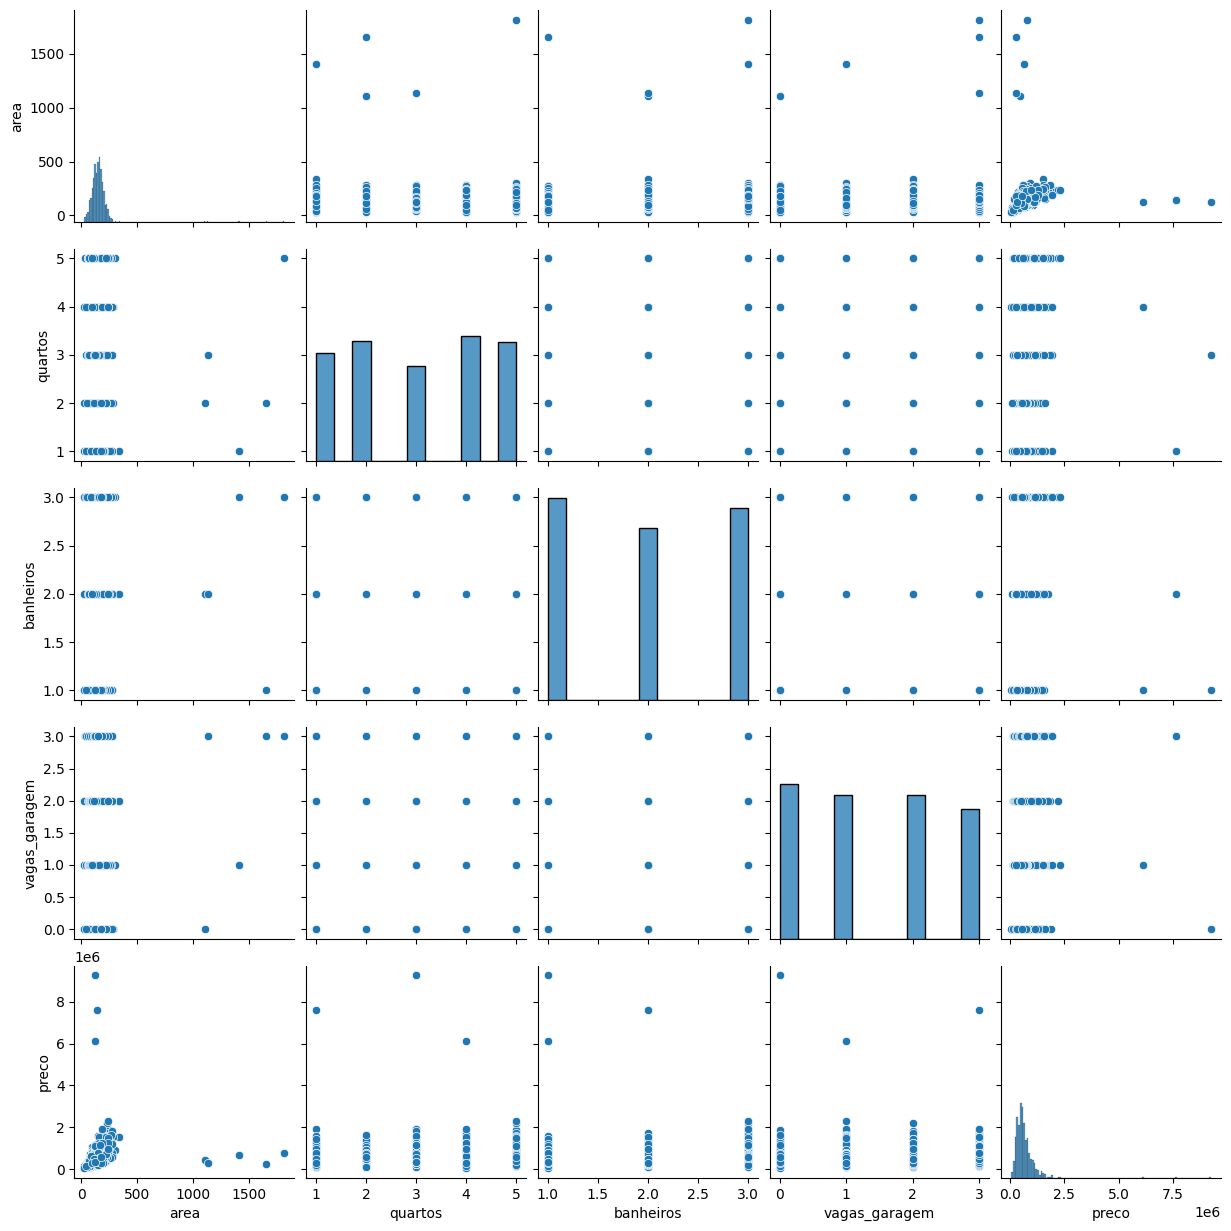

In [44]:


sns.pairplot(df[['area', 'quartos', 'banheiros', 'vagas_garagem', 'preco']])
plt.show()

In [45]:
df['area'] = pd.to_numeric(df['area'], errors='coerce')

# Verificando registros que tenham mais de 1000 metros de área
print("Registros com área maior que 1000m²:")
print(df[df['area'] > 1000][['area', 'preco', 'bairro']])

# Mostrando os 10 imóveis com maiores áreas
print("\nTop 10 imóveis com maiores áreas:")
print(df.nlargest(10, 'area')[['area', 'preco', 'bairro']])



Registros com área maior que 1000m²:
            area      preco      bairro
58   1816.620504  798994.41  Santa Cruz
168  1106.756330  451773.45    São José
300  1655.172143  255311.82   Vila Nova
451  1407.991483  666063.79    São José
536  1134.720445  282180.23   Vila Nova

Top 10 imóveis com maiores áreas:
            area       preco          bairro
58   1816.620504   798994.41      Santa Cruz
300  1655.172143   255311.82       Vila Nova
451  1407.991483   666063.79        São José
536  1134.720445   282180.23       Vila Nova
168  1106.756330   451773.45        São José
209   342.600000  1532178.21  Jardim América
478   303.900000   918189.50      Santa Cruz
179   286.000000   795386.91       Vila Nova
755   281.600000  1525546.60      Bela Vista
654   278.700000  1845398.37          Centro


In [46]:
# 1. Imputação de valores nulos
for coluna in ['area', 'quartos', 'banheiros', 'idade']:
    df[coluna] = df[coluna].fillna(df[coluna].median())


In [47]:
# 2. Correção de valores negativos
# Para idade, usamos a mediana geral
mediana_idade = df.loc[df['idade'] >= 0, 'idade'].median()
df.loc[df['idade'] < 0, 'idade'] = mediana_idade

# Para distância ao centro, usamos a mediana por bairro
for bairro in df['bairro'].unique():
    # Calcula mediana das distâncias válidas para o bairro
    mediana_dist = df.loc[(df['bairro'] == bairro) & (df['distancia_centro'] >= 0), 'distancia_centro'].median()
    # Corrige valores negativos para este bairro
    df.loc[(df['bairro'] == bairro) & (df['distancia_centro'] < 0), 'distancia_centro'] = mediana_dist

In [48]:
# 3. Correção de bairros inexistentes
bairros_validos = [
    'Centro', 'Jardim América', 'Vila Nova', 'Bela Vista', 'Santa Cruz',
    'São José', 'Vila Maria', 'Boa Vista', 'Santa Tereza', 'Vila São Paulo'
]
moda_bairro = df[df['bairro'].isin(bairros_validos)]['bairro'].mode()[0]
df.loc[~df['bairro'].isin(bairros_validos), 'bairro'] = moda_bairro

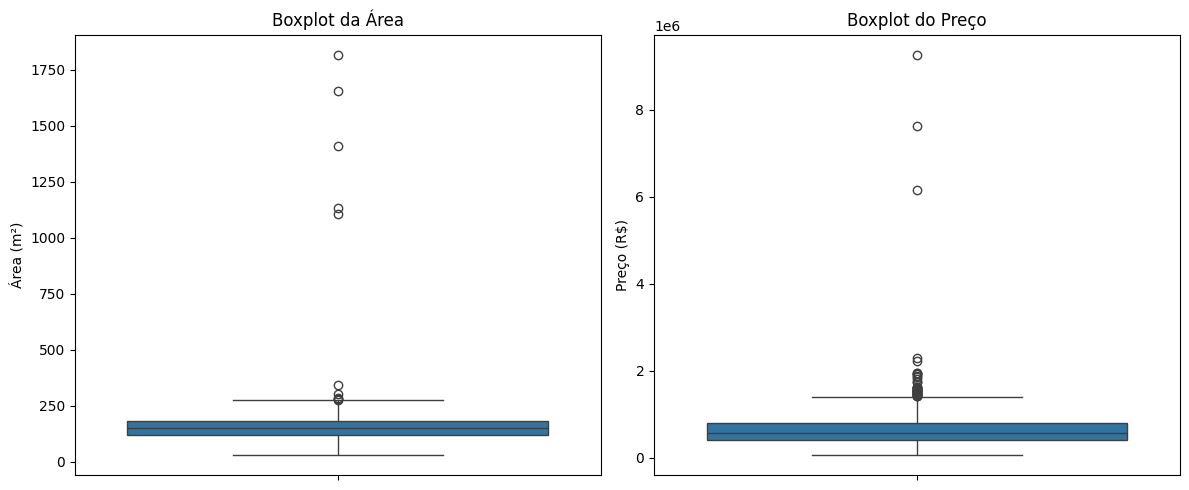

In [49]:
# Criando boxplots para área e preço
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.boxplot(y=df['area'])
plt.title('Boxplot da Área')
plt.ylabel('Área (m²)')

plt.subplot(1, 2, 2)
sns.boxplot(y=df['preco'])
plt.title('Boxplot do Preço')
plt.ylabel('Preço (R$)')

plt.tight_layout()
plt.show()


In [50]:
# 4. Winsorização de outliers
for coluna in ['area', 'preco']:
    p99 = df[coluna].quantile(0.99)
    p01 = df[coluna].quantile(0.01)
    df[coluna] = np.clip(df[coluna], p01, p99)

print(df.describe())

              area      quartos    banheiros  vagas_garagem    mobiliado  \
count  1000.000000  1000.000000  1000.000000    1000.000000  1000.000000   
mean    151.617660     3.044000     1.983000       1.436000     0.704000   
std      48.552818     1.418477     0.830301       1.114067     0.456719   
min      45.879000     1.000000     1.000000       0.000000     0.000000   
25%     118.775000     2.000000     1.000000       0.000000     0.000000   
50%     151.350000     3.000000     2.000000       1.000000     1.000000   
75%     182.325000     4.000000     3.000000       2.000000     1.000000   
max     278.007000     5.000000     3.000000       3.000000     1.000000   

           piscina   area_verde        idade  distancia_centro         preco  
count  1000.000000  1000.000000  1000.000000       1000.000000  1.000000e+03  
mean      0.188000     0.577000    24.145000          4.930200  6.371083e+05  
std       0.390908     0.494283    14.365247          2.085593  3.334233e+05  

In [51]:
print(df.isnull().sum())

area                0
quartos             0
banheiros           0
vagas_garagem       0
bairro              0
mobiliado           0
piscina             0
area_verde          0
idade               0
distancia_centro    0
preco               0
dtype: int64


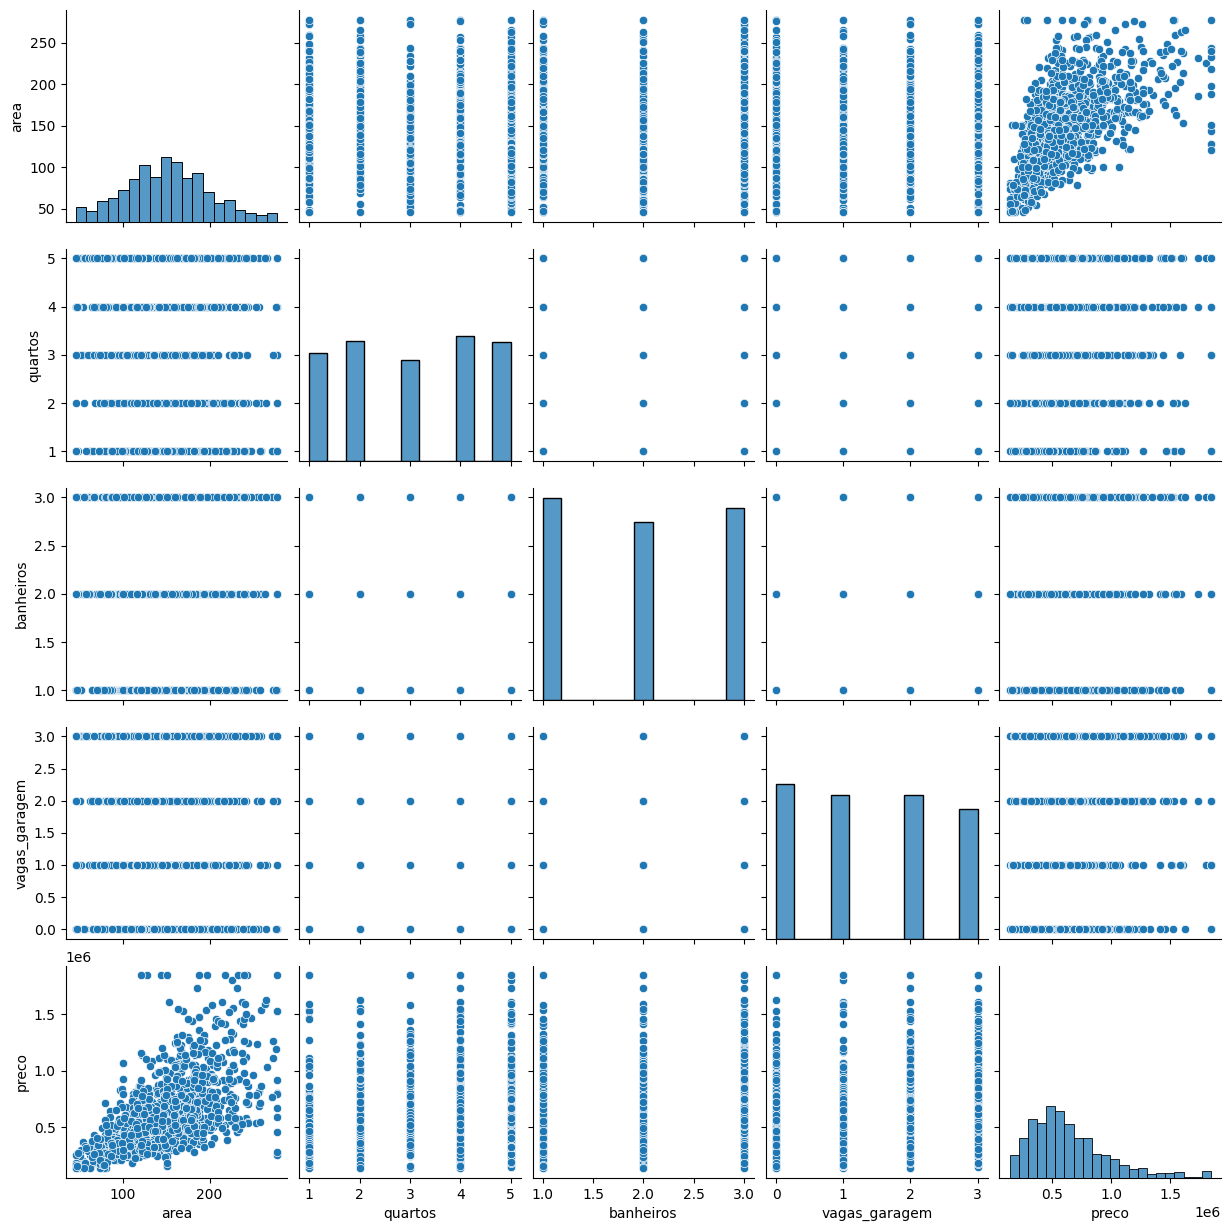

In [52]:


sns.pairplot(df[['area', 'quartos', 'banheiros', 'vagas_garagem', 'preco']])
plt.show()


Resultados da Regressão Linear:
R² Score: 0.4919
RMSE: R$ 239405.83
MAE: R$ 183062.32

Coeficientes do modelo:
area: 3714.05
quartos: 47932.88
banheiros: 69770.45
vagas_garagem: 42350.43
idade: -3054.97
distancia_centro: -11183.29
Intercepto: -146514.34


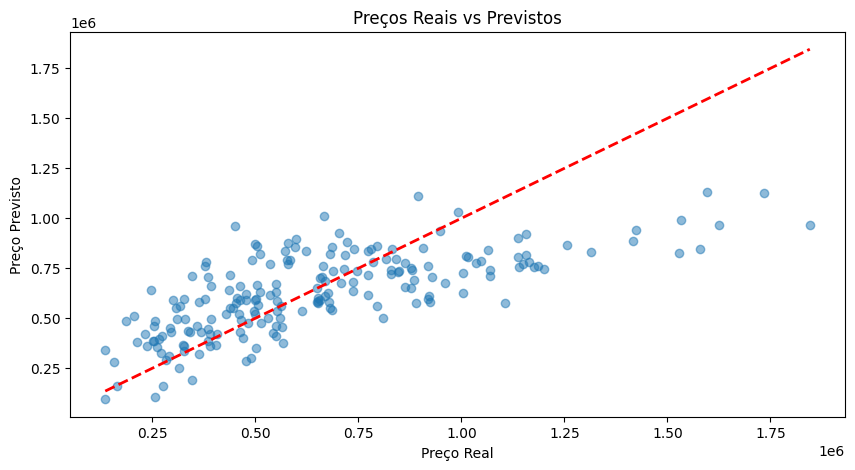

In [53]:
# Executar a análise
avaliar_regressao_linear(df)

In [54]:
# Preço por metro quadrado
df['preco_m2'] = df['preco'] / df['area']

# Idade categorizada
df['idade_cat'] = pd.cut(df['idade'], bins=[-1, 5, 20, 100], labels=['Nova', 'Média', 'Antiga'])

# Indicador de imóvel premium
df['imovel_premium'] = ((df['mobiliado'] == 1) & (df['piscina'] == 1) & (df['area_verde'] == 1)).astype(int)

# Quartos por banheiro
df['quartos_por_banheiro'] = df['quartos'] / df['banheiros']

# Distância categorizada
df['distancia_cat'] = pd.cut(df['distancia_centro'], bins=[-1, 2, 5, 100], labels=['Central', 'Intermediário', 'Periférico'])

# Vagas por quarto
df['vagas_por_quarto'] = df['vagas_garagem'] / df['quartos']

In [55]:
df_eng = df.copy()

# Dropando colunas que não são preco_m2, idade_cat, distancia_cat, quartos_por_banheiro, vagas_por_quarto, imovel_premium
df_eng = df_eng.drop(columns=['area', 'quartos', 'banheiros', 'vagas_garagem', 'bairro', 'mobiliado', 'piscina', 'area_verde', 'idade', 'distancia_centro'])



In [56]:
df_eng.head()

,preco,preco_m2,idade_cat,imovel_premium,quartos_por_banheiro,distancia_cat,vagas_por_quarto
0,725806.38,4152.210412,Média,0,1.333333,Intermediário,0.750000
1,719442.29,5027.549196,Média,0,0.333333,Central,1.000000
2,555961.55,3048.034814,Antiga,0,3.000000,Intermediário,0.000000
3,1802788.72,7969.888240,Nova,0,1.666667,Intermediário,0.200000
4,510616.59,3692.093926,Média,0,1.000000,Intermediário,0.333333



Resultados da Regressão Linear com Engenharia de Features:
R² Score: 0.5516
RMSE: R$ 224906.43
MAE: R$ 167596.68

Coeficientes do modelo:
preco_m2: 149.64
quartos_por_banheiro: -5900.84
vagas_por_quarto: 11850.45
imovel_premium: -17453.88
Intercepto: 11411.62


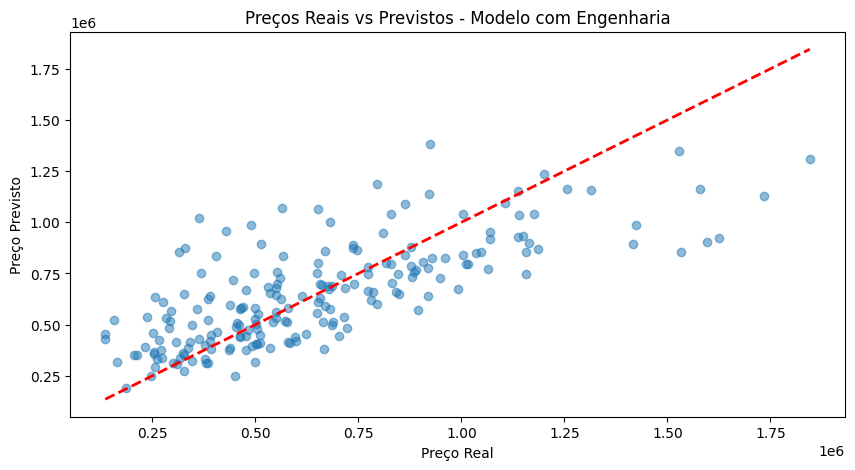

(LinearRegression(), 0.5516014074691891, np.float64(224906.43168308464))

In [57]:
# Executar a análise
avaliar_regressao_linear_eng(df_eng)

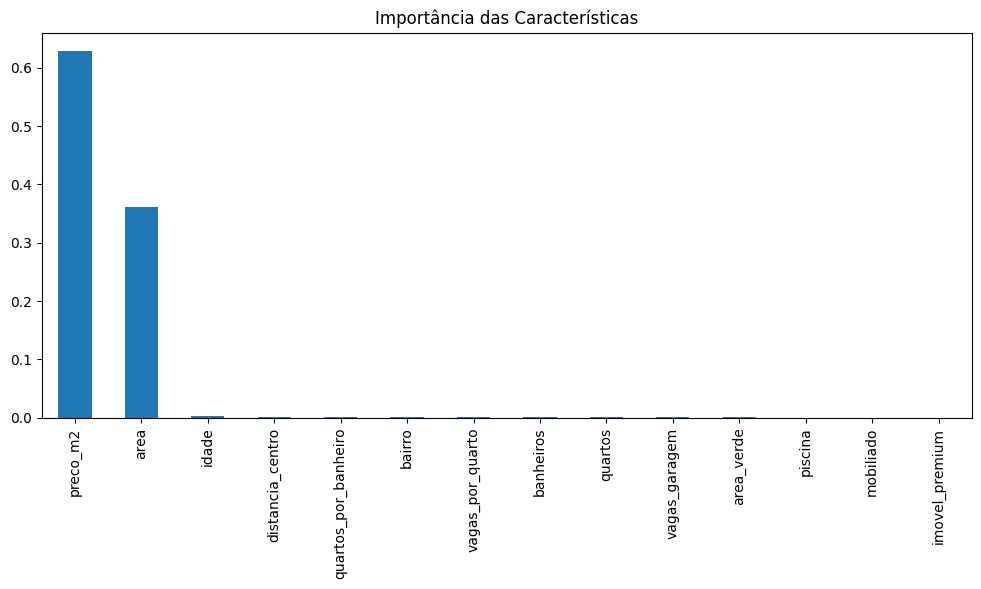

Top features: ['preco_m2', 'area', 'idade', 'distancia_centro', 'quartos_por_banheiro', 'bairro', 'vagas_por_quarto', 'banheiros', 'quartos', 'vagas_garagem']


In [59]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder

# Selecionar apenas variáveis numéricas para o modelo e codificar variáveis categóricas
X = df.drop(['preco', 'idade_cat', 'distancia_cat'], axis=1)

# Codificar a coluna 'bairro' usando LabelEncoder
le = LabelEncoder()
X['bairro'] = le.fit_transform(X['bairro'])

y = df['preco']

# Treinar um modelo simples para ver a importância das features
modelo = RandomForestRegressor(n_estimators=100, random_state=42)
modelo.fit(X, y)

importancias = pd.Series(modelo.feature_importances_, index=X.columns)
importancias.sort_values(ascending=False).plot(kind='bar', figsize=(12, 5))
plt.title('Importância das Características')
plt.show()

# Selecionar as top N features
top_features = importancias.sort_values(ascending=False).head(10).index.tolist()
print('Top features:', top_features)

In [60]:
df_area = df.copy()

# Pegando um df que seja apenas area e preco
df_area = df_area[['area', 'preco']]
df_area.head()


,area,preco
0,174.8,725806.38
1,143.1,719442.29
2,182.4,555961.55
3,226.2,1802788.72
4,138.3,510616.59



Resultados da Regressão Linear apenas com Área:
R² Score: 0.3646
RMSE: R$ 267736.87
MAE: R$ 207802.61

Coeficientes do modelo:
area: 3892.02
Intercepto: 42590.60


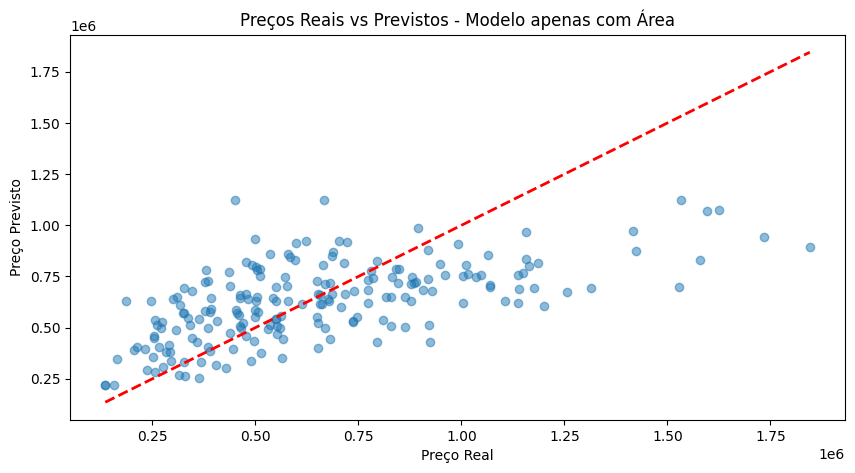

(LinearRegression(), 0.36455664907918184, np.float64(267736.8655471071))

In [61]:
# Avaliar a regressão linear com area e preco
avaliar_regressao_linear_area(df_area)



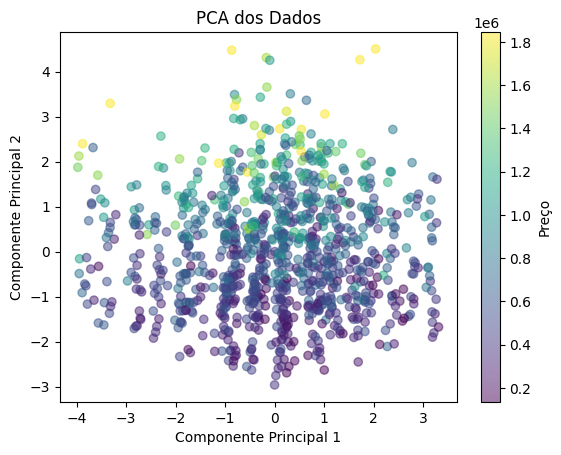

In [62]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Preparar os dados - codificar variáveis categóricas
X_prep = df[top_features].copy()
le = LabelEncoder()
if 'bairro' in top_features:
    X_prep['bairro'] = le.fit_transform(X_prep['bairro'])

# Padronizar os dados
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_prep)

# Reduzir para 2 componentes principais
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualizar os dados reduzidos
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap='viridis', alpha=0.5)
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.title('PCA dos Dados')
plt.colorbar(label='Preço')
plt.show()


Resultados da Regressão Linear com PCA:
R² Score: 0.4254
RMSE: R$ 254602.04
MAE: R$ 189413.24


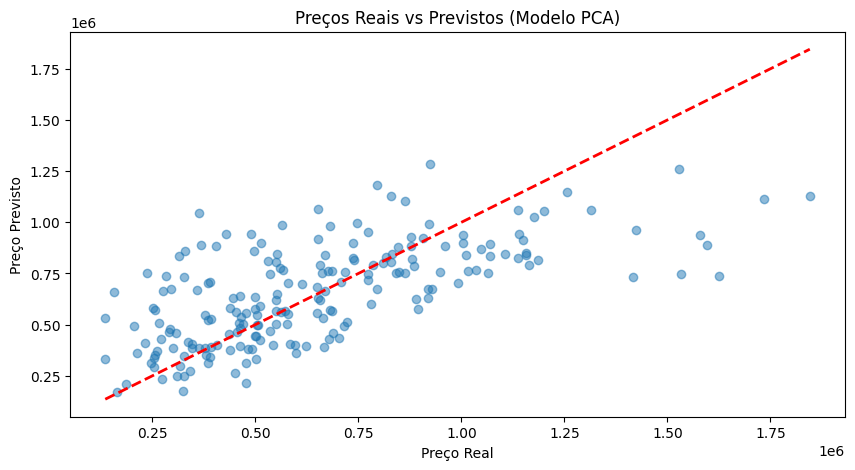


Variância explicada pelos componentes principais:
PC1: 0.2311
PC2: 0.1740
Variância total explicada: 0.4051


In [65]:
# Preparar os dados com PCA para regressão
X_pca_reg = pca.fit_transform(X_scaled)

# Dividir em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_pca_reg, y, test_size=0.2, random_state=42)

# Criar e treinar o modelo
modelo_pca = LinearRegression()
modelo_pca.fit(X_train, y_train)

# Fazer previsões
y_pred = modelo_pca.predict(X_test)

# Calcular métricas
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)

print("\nResultados da Regressão Linear com PCA:")
print(f"R² Score: {r2:.4f}")
print(f"RMSE: R$ {rmse:.2f}")
print(f"MAE: R$ {mae:.2f}")

# Plotar resultados
plt.figure(figsize=(10, 5))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Preço Real')
plt.ylabel('Preço Previsto')
plt.title('Preços Reais vs Previstos (Modelo PCA)')
plt.show()

# Explicar a variância dos componentes principais
print("\nVariância explicada pelos componentes principais:")
print(f"PC1: {pca.explained_variance_ratio_[0]:.4f}")
print(f"PC2: {pca.explained_variance_ratio_[1]:.4f}")
print(f"Variância total explicada: {sum(pca.explained_variance_ratio_):.4f}")


| Modelo                                 | R² Score | RMSE (R$)     | MAE (R$)      |
|----------------------------------------|----------|---------------|---------------|
| Regressão Pura                         | 0.2480   | 326.623,12    | 254.910,74    |
| Regressão com Limpeza                  | 0.4919   | 239.405,83    | 183.062,32    |
| Regressão com Engenharia de Features   | 0.5516   | 224.906,43    | 167.596,68    |
| Regressão apenas com Área              | 0.3646   | 267.736,87    | 207.802,61    |
| Regressão com PCA                      | 0.4254   | 254.602,04    | 189.413,24    |


## Conclusões

- A **engenharia de características** melhorou o desempenho do modelo.
- A **regressão linear simples com `area`** teve desempenho limitado, reforçando a necessidade de mais variáveis.
- O uso de **PCA** reduziu a dimensionalidade com bom resultado, mas com pequena perda de interpretabilidade.
- Modelos com variáveis bem selecionadas (via Random Forest ou conhecimento de domínio) tendem a generalizar melhor.
